# Bektas Talayoglu - Weather Forecasting Game

## Importing the Dependencies

In [1]:
import numpy as np  # Fundamental package for numerical computing
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Plotting library for creating visualizations
import seaborn as sns  # Statistical data visualization library
import glob  # Module for file path pattern matching
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.ensemble import RandomForestRegressor # Random forest regressors
from sklearn import metrics  # Module for evaluating model performance metrics
from sklearn.metrics import mean_absolute_error, root_mean_squared_error # metrics
from sklearn.neighbors import KNeighborsRegressor # KNN regression model
from sklearn.preprocessing import MinMaxScaler # Scaler


# Data Collection and Processing

Data collection and processing are the crucial initial steps for obtaining meaningful data to fit our model and achieve significant results.

In [2]:
''' 
    The read_files function is designed to read multiple CSV files, 
    concatenate their contents into a single data frame, remove any duplicate rows, 
    and return the resulting data frame. 
'''

def read_files(file_list):
    data_frames = []
    for csv_file in file_list:
        df = pd.read_csv(csv_file)
        data_frames.append(df)

    df = pd.concat(data_frames).drop_duplicates()
    return df

In [3]:
# This function is used to filter a data frame based on specific dates.

def filter_df(df, start_date, end_date):
    df = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]
    return df

In [4]:
# This function is used to arrange the time-related columns in a data frame.
def arrange_time(df):
    # Convert the 'datetime' column to datetime format if it exists
    if 'datetime' in df.columns:
        df['datetime'] = pd.to_datetime(df['datetime'])
    # Rename the 'time' column to 'datetime' if it exists and is not already named 'datetime'
    if 'time' in df.columns and 'datetime' not in df.columns:
        df.rename({'time': 'datetime'}, axis=1, inplace=True)
        df['datetime'] = pd.to_datetime(df['datetime'])
    return df

In [5]:
# This function is used to remove columns with a null percentage greater than 5% and fill forward remaining null values.
def remove_null(df):
    # Calculate the percentage of null values for each column in data frame
    null_pct = df.apply(pd.isnull).sum() / df.shape[0]

    # Select columns where the null percentage is less than 5%
    valid_col = df.columns[null_pct < 0.05]

    # Create a new data frame df_forcest containing only columns with less than 5% null values
    df = df[valid_col].copy()

    # Fill any remaining null values in data frame
    df = df.ffill()

    return df

In [6]:
# This function is used to convert temperature values from Kelvin to Celsius for specific columns in a DataFrame.
def convert_to_celsius(df):
    temp_cols = ['t2m', 'skt', 'st', 'd2m', 'mx2t6', 'mn2t6']
    for col in temp_cols:
        df[col] = df[col] - 273.15
    return df

In [7]:

df_forecasts = read_files(glob.glob("Forecast_*2023.csv"))

In [8]:
df_forecasts

,time,number,latitude,longitude,cape,sp,tcw,sshf,slhf,msl,...,skt,cin,sm,st,sd,sf,tcc,tp,mx2t6,mn2t6
0,2023-06-25 00:00:00,1,50.75,4.25,0.000000,101200.195,21.317469,-262.0,0.0,102097.770,...,286.74414,NaN,270.69030,292.99152,0.000000e+00,0.000000,2.325569,0.000000,NaN,NaN
1,2023-06-25 00:00:00,2,50.75,4.25,0.000000,101126.710,20.653576,-262.0,0.0,102023.410,...,286.56503,NaN,268.27472,293.05417,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN
2,2023-06-25 00:00:00,3,50.75,4.25,0.000000,101157.790,21.857746,-262.0,0.0,102054.120,...,286.79468,NaN,271.41016,292.95685,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN
3,2023-06-25 00:00:00,4,50.75,4.25,0.000000,101148.336,21.552765,-262.0,0.0,102046.180,...,286.69183,NaN,274.68085,293.01215,0.000000e+00,0.000000,0.781292,0.000000,NaN,NaN
4,2023-06-25 00:00:00,5,50.75,4.25,0.000000,101162.090,20.347164,-262.0,0.0,102059.110,...,286.25560,NaN,289.44977,292.84024,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,2023-03-14 00:00:00,46,50.75,4.25,10.411179,97829.390,17.467186,6301055.0,-20127366.0,98730.570,...,281.29794,NaN,431.48206,281.59912,4.692078e-04,3.334875,99.996400,80.139860,282.79550,282.00680
1446,2023-03-14 00:00:00,47,50.75,4.25,0.197128,98100.130,17.314909,9462542.0,-21047112.0,99005.210,...,280.66345,NaN,418.47000,282.03357,-9.536743e-07,3.104862,99.999450,70.636960,285.08948,281.52322
1447,2023-03-14 00:00:00,48,50.75,4.25,19.707047,98988.240,13.253620,11531872.0,-20810300.0,99900.110,...,281.13986,-14.99815,416.34137,282.38754,-9.536743e-07,7.623967,99.999450,55.187700,285.63898,282.15500
1448,2023-03-14 00:00:00,49,50.75,4.25,0.010376,99438.660,10.973795,5030152.0,-17421660.0,100354.234,...,280.75256,NaN,407.68268,281.68198,-9.536743e-07,5.960190,99.999450,46.964535,284.40890,281.88617


In [9]:
# checking the number of rows and columns
print('Forecast Data set number of rows and columns :', df_forecasts.shape)

# Getting some information about the data frame
df_forecasts.info()

Forecast Data set number of rows and columns : (88450, 28)
<class 'pandas.core.frame.DataFrame'>
Index: 88450 entries, 0 to 1449
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       88450 non-null  object 
 1   number     88450 non-null  int64  
 2   latitude   88450 non-null  float64
 3   longitude  88450 non-null  float64
 4   cape       88450 non-null  float64
 5   sp         88450 non-null  float64
 6   tcw        88450 non-null  float64
 7   sshf       88450 non-null  float64
 8   slhf       88450 non-null  float64
 9   msl        88450 non-null  float64
 10  u10        88450 non-null  float64
 11  v10        88450 non-null  float64
 12  t2m        88450 non-null  float64
 13  d2m        88450 non-null  float64
 14  ssr        88450 non-null  float64
 15  str        88450 non-null  float64
 16  ttr        88450 non-null  float64
 17  sund       88450 non-null  float64
 18  skt        88450 non-null  float6

Number of null values:
cin      73019
mx2t6     3050
mn2t6     3050
dtype: int64


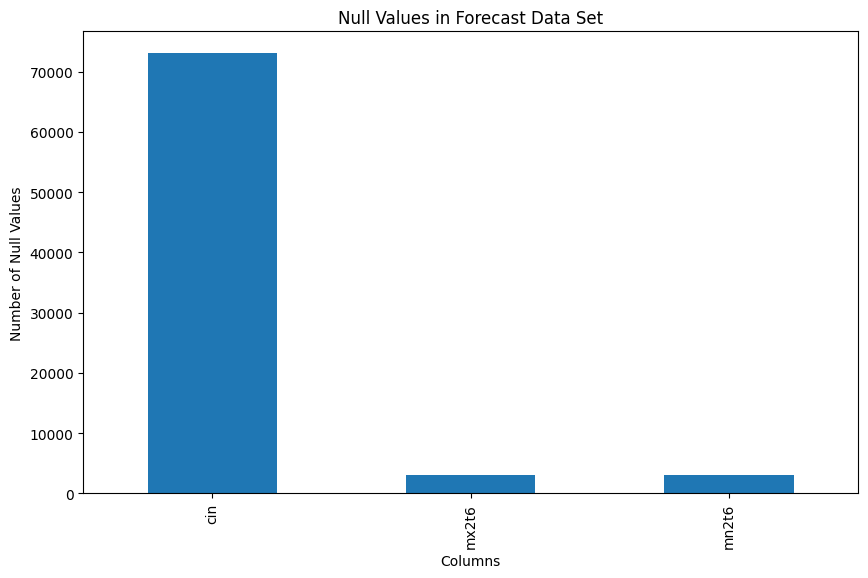

In [10]:

# Check for missing values in the DataFrame
null_counts = df_forecasts.isnull().sum()

# Filter null_counts to only include columns with null values greater than 0
null_counts_gt_0 = null_counts[null_counts > 0]

# Print the number of null values for each column where null values are greater than 0
print("Number of null values:")
print(null_counts_gt_0)

# plot null values
plt.figure(figsize=(10, 6))
null_counts[null_counts > 0].plot(kind='bar') 
plt.title('Null Values in Forecast Data Set')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.show()

After looking at the graph, i found that there are a lot of missing values in the "cin" attribute. These missing values could cause problems and can affect the quality of our model. So, I've decided to remove this attribute(feauture) from the DataFrame.

In [11]:
df_forecasts = arrange_time(df_forecasts)
df_forecasts

,datetime,number,latitude,longitude,cape,sp,tcw,sshf,slhf,msl,...,skt,cin,sm,st,sd,sf,tcc,tp,mx2t6,mn2t6
0,2023-06-25,1,50.75,4.25,0.000000,101200.195,21.317469,-262.0,0.0,102097.770,...,286.74414,NaN,270.69030,292.99152,0.000000e+00,0.000000,2.325569,0.000000,NaN,NaN
1,2023-06-25,2,50.75,4.25,0.000000,101126.710,20.653576,-262.0,0.0,102023.410,...,286.56503,NaN,268.27472,293.05417,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN
2,2023-06-25,3,50.75,4.25,0.000000,101157.790,21.857746,-262.0,0.0,102054.120,...,286.79468,NaN,271.41016,292.95685,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN
3,2023-06-25,4,50.75,4.25,0.000000,101148.336,21.552765,-262.0,0.0,102046.180,...,286.69183,NaN,274.68085,293.01215,0.000000e+00,0.000000,0.781292,0.000000,NaN,NaN
4,2023-06-25,5,50.75,4.25,0.000000,101162.090,20.347164,-262.0,0.0,102059.110,...,286.25560,NaN,289.44977,292.84024,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,2023-03-14,46,50.75,4.25,10.411179,97829.390,17.467186,6301055.0,-20127366.0,98730.570,...,281.29794,NaN,431.48206,281.59912,4.692078e-04,3.334875,99.996400,80.139860,282.79550,282.00680
1446,2023-03-14,47,50.75,4.25,0.197128,98100.130,17.314909,9462542.0,-21047112.0,99005.210,...,280.66345,NaN,418.47000,282.03357,-9.536743e-07,3.104862,99.999450,70.636960,285.08948,281.52322
1447,2023-03-14,48,50.75,4.25,19.707047,98988.240,13.253620,11531872.0,-20810300.0,99900.110,...,281.13986,-14.99815,416.34137,282.38754,-9.536743e-07,7.623967,99.999450,55.187700,285.63898,282.15500
1448,2023-03-14,49,50.75,4.25,0.010376,99438.660,10.973795,5030152.0,-17421660.0,100354.234,...,280.75256,NaN,407.68268,281.68198,-9.536743e-07,5.960190,99.999450,46.964535,284.40890,281.88617


In [12]:
df_forecasts.set_index('number', inplace=True)

In [13]:
df_forecasts = remove_null(df_forecasts)
df_forecasts.isnull().sum()

datetime      0
latitude      0
longitude     0
cape          0
sp            0
tcw           0
sshf          0
slhf          0
msl           0
u10           0
v10           0
t2m           0
d2m           0
ssr           0
str           0
ttr           0
sund          0
skt           0
sm            0
st            0
sd            0
sf            0
tcc           0
tp            0
mx2t6        50
mn2t6        50
dtype: int64

There are 50 instances where both the 'mn2t6' and 'mx2t6' columns have missing values. To ensure our analysis is reliable, I'll be removing these instances with missing data from the Forecast DataFrame.

In [14]:
df_forecasts.reset_index(inplace=True)
df_forecasts.set_index('datetime',inplace=True)

In [15]:
# Check for null values in df_forecasts after dropping rows
df_forecasts.dropna(inplace=True)
df_forecasts.apply(pd.isnull).sum()

number       0
latitude     0
longitude    0
cape         0
sp           0
tcw          0
sshf         0
slhf         0
msl          0
u10          0
v10          0
t2m          0
d2m          0
ssr          0
str          0
ttr          0
sund         0
skt          0
sm           0
st           0
sd           0
sf           0
tcc          0
tp           0
mx2t6        0
mn2t6        0
dtype: int64

In [16]:
df_forecasts = convert_to_celsius(df_forecasts)
df_forecasts

,number,latitude,longitude,cape,sp,tcw,sshf,slhf,msl,u10,...,sund,skt,sm,st,sd,sf,tcc,tp,mx2t6,mn2t6
datetime,,,,,,,,,,,,,,,,,,,,,
2023-06-25 06:00:00,1,50.75,4.25,0.000000,100980.414,23.960630,179972.0,-301532.0,101877.625,-1.200869,...,6478.500,19.66448,270.17820,18.82552,0.000000e+00,0.000000,0.00000,0.000000,18.40530,14.92510
2023-06-25 06:00:00,2,50.75,4.25,0.000000,100925.000,25.295574,187808.0,-292916.0,101822.984,-1.103926,...,6478.500,20.17074,267.76746,18.97640,0.000000e+00,0.000000,0.00000,0.000000,19.02060,15.44033
2023-06-25 06:00:00,3,50.75,4.25,0.000000,100919.945,24.482294,189766.0,-319992.0,101816.670,-1.393443,...,6478.500,19.84580,270.86905,18.86000,0.000000e+00,0.000000,0.00000,0.000000,18.70920,15.20345
2023-06-25 06:00:00,4,50.75,4.25,0.000000,100935.670,25.043571,166912.0,-308916.0,101832.960,-1.184368,...,6478.500,19.82186,274.17358,18.83960,0.000000e+00,0.000000,0.00000,0.000000,18.54910,14.94497
2023-06-25 06:00:00,5,50.75,4.25,0.000000,100948.586,24.260838,144708.0,-294148.0,101844.790,-0.818346,...,6478.500,19.45390,288.87967,18.66190,0.000000e+00,0.000000,0.00000,0.000000,19.49523,14.65500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-14 00:00:00,46,50.75,4.25,10.411179,97829.390,17.467186,6301055.0,-20127366.0,98730.570,4.206048,...,51089.637,8.14794,431.48206,8.44912,4.692078e-04,3.334875,99.99640,80.139860,9.64550,8.85680
2023-03-14 00:00:00,47,50.75,4.25,0.197128,98100.130,17.314909,9462542.0,-21047112.0,99005.210,5.408600,...,41973.960,7.51345,418.47000,8.88357,-9.536743e-07,3.104862,99.99945,70.636960,11.93948,8.37322
2023-03-14 00:00:00,48,50.75,4.25,19.707047,98988.240,13.253620,11531872.0,-20810300.0,99900.110,5.858001,...,77561.720,7.98986,416.34137,9.23754,-9.536743e-07,7.623967,99.99945,55.187700,12.48898,9.00500


In [17]:
# Function call to read target CSV file
df_target = read_files(['vlinder19_2023.csv'])
df_target

,temp,datetime
0,15.7,2023-01-01 00:00:00
1,15.6,2023-01-01 00:05:00
2,15.6,2023-01-01 00:10:00
3,15.5,2023-01-01 00:15:00
4,15.5,2023-01-01 00:20:00
...,...,...
104597,9.1,2023-12-30 23:40:00
104598,9.0,2023-12-30 23:45:00
104599,9.0,2023-12-30 23:50:00
104600,8.9,2023-12-30 23:55:00


In [18]:

print('Target Data set number of rows and columns :', df_target.shape)

Target Data set number of rows and columns : (104602, 2)


In [19]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104602 entries, 0 to 104601
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   temp      104602 non-null  float64
 1   datetime  104602 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1.6+ MB


In [20]:
df_target = arrange_time(df_target)
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104602 entries, 0 to 104601
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   temp      104602 non-null  float64       
 1   datetime  104602 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 MB


In [21]:
df_target

,temp,datetime
0,15.7,2023-01-01 00:00:00
1,15.6,2023-01-01 00:05:00
2,15.6,2023-01-01 00:10:00
3,15.5,2023-01-01 00:15:00
4,15.5,2023-01-01 00:20:00
...,...,...
104597,9.1,2023-12-30 23:40:00
104598,9.0,2023-12-30 23:45:00
104599,9.0,2023-12-30 23:50:00
104600,8.9,2023-12-30 23:55:00


By checking information about target data frame we see that there is no any missing value in this DataFrame. Since our Forecast DataFrame only covers the period from 2023-02-01, to 2023-07-07, we filter our Target DataFrame to match this time range.

In [22]:
# The function is called with the specified date range, resulting in a DataFrame that includes only the rows within that date range.
df_target = filter_df(df_target, '2023-02-01','2023-07-07')

In [23]:
df_target.set_index('datetime', inplace=True)

In [24]:
df_target

,temp
datetime,
2023-02-01 00:00:00,6.0
2023-02-01 00:05:00,6.0
2023-02-01 00:10:00,6.0
2023-02-01 00:15:00,6.0
2023-02-01 00:20:00,6.0
...,...
2023-07-06 23:40:00,17.4
2023-07-06 23:45:00,17.5
2023-07-06 23:50:00,17.5


The Target DataFrame contains temperature measurements taken every 5 minutes. I resampled the data to show readings at 6-hour intervals. To decide whether to use the mean of temperature or the first recorded value within each interval, I checked their correlations.

In [25]:
# Resample df_target to 6-hour intervals and take the first value within each interval
df_target1 = df_target.resample('6h').first()

# Resample df_target to 6-hour intervals and calculate the mean within each interval
df_target2 = df_target.resample('6h').mean()

In [26]:
# Calculate the correlation coefficient between the 'temp' column in df_target1 and the 't2m' column in df_forcest
corr1 = df_target1['temp'].corr(df_forecasts['t2m'])
print(corr1)

0.9212828171891289


In [27]:

# Calculate the correlation coefficient between the 'temp' column in df_target2 and the 't2m' column in df_forecasts
corr2 = df_target2['temp'].corr(df_forecasts['t2m'])
print(corr2)

0.899554545385843


Upon calculating the correlation, I observed that taking the first value within each interval resulted in a higher correlation coefficient. Therefore, I decided to choose that approach.

In [28]:
# Resample df_target to 6-hour intervals and take the first value within each interval
df_target = df_target.resample('6h').first()

In [29]:
# checking the number of missing values for target dataframe
df_target.apply(pd.isnull).sum()

temp    0
dtype: int64

In [30]:
df_target

,temp
datetime,
2023-02-01 00:00:00,6.0
2023-02-01 06:00:00,4.1
2023-02-01 12:00:00,8.3
2023-02-01 18:00:00,8.0
2023-02-02 00:00:00,8.0
...,...
2023-07-06 00:00:00,13.8
2023-07-06 06:00:00,13.3
2023-07-06 12:00:00,21.5


In [31]:
# This fuction is to visualize the temperature data over time
def graph_temp(df):
    plt.figure(figsize=(10, 8))
    plt.title('Temperature Over Time')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.grid(True)

    # Plot the 'temparature' column from data frame
    df.plot(ax=plt.gca(), color='blue', linestyle='-', marker='o', markersize=0, label='Temperature')

    plt.ylim(-5, 40)

    plt.legend(loc='upper left')
    plt.show()

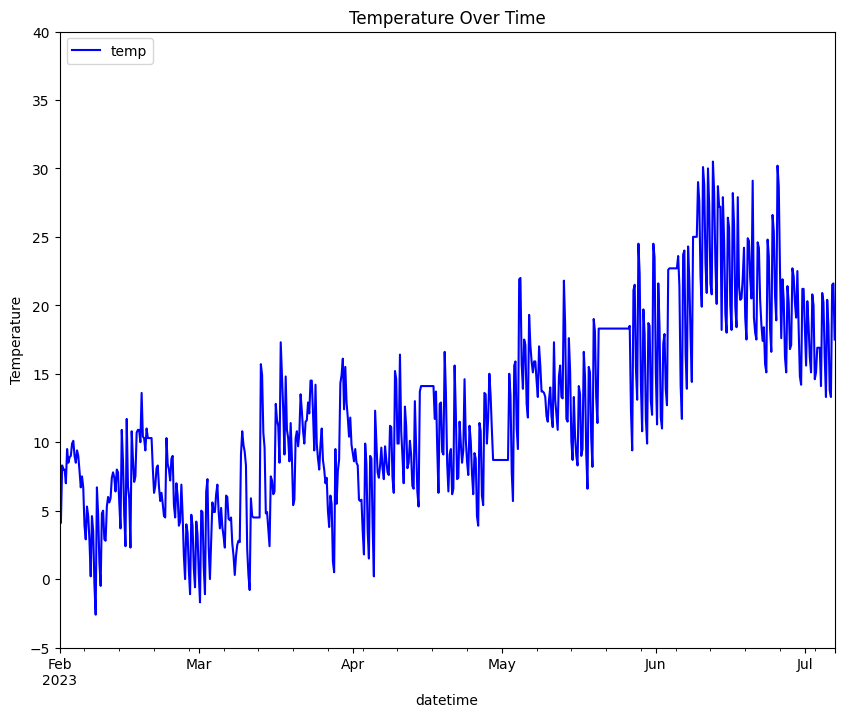

In [32]:
# see target temperature data over time
graph_temp(df_target)

After analyzing the graph we can observe that there are intervals where the temperature remains constant. This could be because the sensor isn't working properly or some other problems. So, I decided to remove those periods from the dataframe to incrase data quality.





In [33]:
# This code filters out consecutive rows in the data frame where the temperature remains constant.
df_target = df_target[df_target['temp'] != df_target['temp'].shift()] 
df_target

,temp
datetime,
2023-02-01 00:00:00,6.0
2023-02-01 06:00:00,4.1
2023-02-01 12:00:00,8.3
2023-02-01 18:00:00,8.0
2023-02-02 06:00:00,7.0
...,...
2023-07-06 00:00:00,13.8
2023-07-06 06:00:00,13.3
2023-07-06 12:00:00,21.5


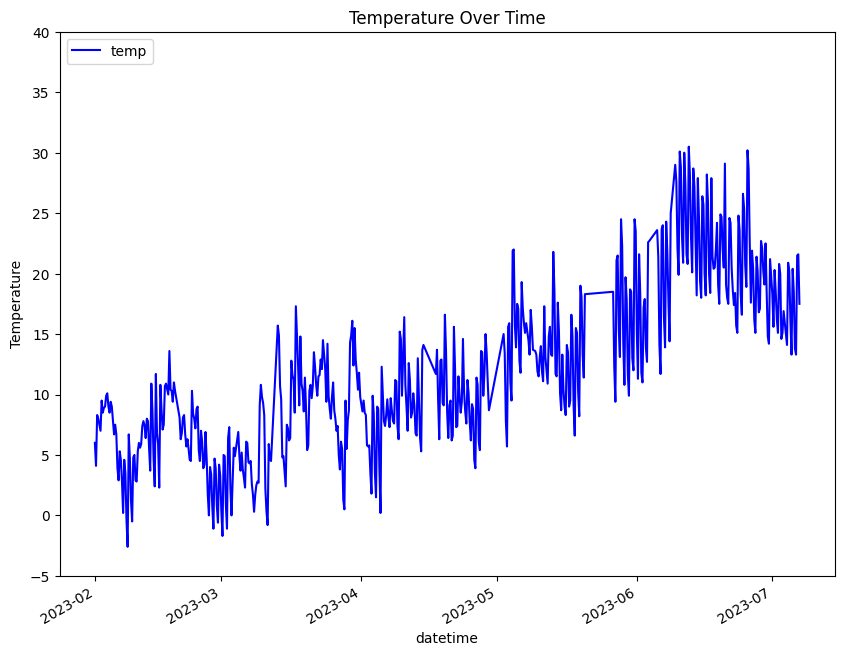

In [34]:
# Analyze graph after filtering data
graph_temp(df_target)

# Merge DataFrames

Before merging two dataframe i removed the unnecessary columns that do not affect our model. These columns include 'number', 'latitude', and 'longitude'. In Forecast DateFrame there are 50 predictions for each feature at every 6h therefore resampled Forecast DataFrame to a 6-hour interval and calculating the mean value for each interval.

In [35]:

df_forecasts_resample = df_forecasts.copy()
df_forecasts_resample.drop(columns=['number', 'latitude', 'longitude'], inplace=True)

# Resampling the forecast data to a 6-hour interval and calculating the mean value for each interval
df_forecasts_resample = df_forecasts_resample.resample('6h').mean()

df_forecasts_resample

,cape,sp,tcw,sshf,slhf,msl,u10,v10,t2m,d2m,...,sund,skt,sm,st,sd,sf,tcc,tp,mx2t6,mn2t6
datetime,,,,,,,,,,,,,,,,,,,,,
2023-02-01 00:00:00,26.999555,101405.12482,10.119734,9.950000e+01,-80.00,102349.48480,4.411379,0.689468,5.367868,4.192191,...,-0.007812,3.804640,365.826249,5.064452,0.0,2.384186e-07,87.974877,0.000000,10.446740,3.982700
2023-02-01 06:00:00,0.000000,101389.66550,8.448789,1.153484e+06,-277156.40,102339.47328,5.599540,0.968346,3.431147,1.232482,...,-0.007812,2.020916,365.320845,4.210537,0.0,2.384186e-07,63.833502,0.034049,5.396558,3.456113
2023-02-01 12:00:00,0.030236,101380.89104,10.783472,1.298347e+06,-1159874.96,102321.36640,7.357232,0.802450,8.216325,2.827200,...,15618.247140,9.188060,364.152925,5.092130,0.0,2.384186e-07,57.890487,0.035894,8.054712,3.248400
2023-02-01 18:00:00,3.563456,101430.54792,13.866288,1.396992e+06,-2030212.25,102371.14534,6.240224,0.888931,7.188929,3.389043,...,26227.818440,6.442733,363.077427,5.591748,0.0,2.384186e-07,99.896129,0.158542,8.817457,7.174319
2023-02-02 00:00:00,2.688163,101476.17742,14.214129,2.248730e+06,-2268868.16,102418.95684,5.636197,0.509255,6.394677,4.008915,...,26227.818440,5.480064,363.188737,5.488849,0.0,2.384186e-07,93.188666,0.406755,7.269251,6.295617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-06 00:00:00,4.543274,100705.68526,20.189040,-1.684178e+07,-51947957.28,101568.84948,2.143008,2.189734,13.741291,10.693824,...,256466.123400,12.584842,242.954313,17.282274,0.0,0.000000e+00,36.144449,10.199238,18.902135,13.754760
2023-07-06 06:00:00,3.398105,100841.27356,19.364479,-1.651539e+07,-52227710.92,101709.52588,2.085270,2.191051,14.404835,11.346327,...,261145.993000,15.421512,245.164795,16.331155,0.0,0.000000e+00,40.088442,10.862635,14.466089,12.298845
2023-07-06 12:00:00,13.520046,100940.85862,19.726219,-1.922309e+07,-56301730.92,101797.48870,3.367249,1.713943,21.046616,10.217461,...,281471.779800,25.193074,241.726561,18.841816,0.0,0.000000e+00,53.938519,11.096722,20.982576,14.399161


In [36]:
# merge two dataframes
df_merged = df_forecasts_resample.merge(df_target,how='left',left_on='datetime',  right_on='datetime')
df_merged

,cape,sp,tcw,sshf,slhf,msl,u10,v10,t2m,d2m,...,skt,sm,st,sd,sf,tcc,tp,mx2t6,mn2t6,temp
datetime,,,,,,,,,,,,,,,,,,,,,
2023-02-01 00:00:00,26.999555,101405.12482,10.119734,9.950000e+01,-80.00,102349.48480,4.411379,0.689468,5.367868,4.192191,...,3.804640,365.826249,5.064452,0.0,2.384186e-07,87.974877,0.000000,10.446740,3.982700,6.0
2023-02-01 06:00:00,0.000000,101389.66550,8.448789,1.153484e+06,-277156.40,102339.47328,5.599540,0.968346,3.431147,1.232482,...,2.020916,365.320845,4.210537,0.0,2.384186e-07,63.833502,0.034049,5.396558,3.456113,4.1
2023-02-01 12:00:00,0.030236,101380.89104,10.783472,1.298347e+06,-1159874.96,102321.36640,7.357232,0.802450,8.216325,2.827200,...,9.188060,364.152925,5.092130,0.0,2.384186e-07,57.890487,0.035894,8.054712,3.248400,8.3
2023-02-01 18:00:00,3.563456,101430.54792,13.866288,1.396992e+06,-2030212.25,102371.14534,6.240224,0.888931,7.188929,3.389043,...,6.442733,363.077427,5.591748,0.0,2.384186e-07,99.896129,0.158542,8.817457,7.174319,8.0
2023-02-02 00:00:00,2.688163,101476.17742,14.214129,2.248730e+06,-2268868.16,102418.95684,5.636197,0.509255,6.394677,4.008915,...,5.480064,363.188737,5.488849,0.0,2.384186e-07,93.188666,0.406755,7.269251,6.295617,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-06 00:00:00,4.543274,100705.68526,20.189040,-1.684178e+07,-51947957.28,101568.84948,2.143008,2.189734,13.741291,10.693824,...,12.584842,242.954313,17.282274,0.0,0.000000e+00,36.144449,10.199238,18.902135,13.754760,13.8
2023-07-06 06:00:00,3.398105,100841.27356,19.364479,-1.651539e+07,-52227710.92,101709.52588,2.085270,2.191051,14.404835,11.346327,...,15.421512,245.164795,16.331155,0.0,0.000000e+00,40.088442,10.862635,14.466089,12.298845,13.3
2023-07-06 12:00:00,13.520046,100940.85862,19.726219,-1.922309e+07,-56301730.92,101797.48870,3.367249,1.713943,21.046616,10.217461,...,25.193074,241.726561,18.841816,0.0,0.000000e+00,53.938519,11.096722,20.982576,14.399161,21.5


In [37]:
# check if there is null in merged dataframe
df_merged.apply(pd.isnull).sum()

cape      0
sp        0
tcw       0
sshf      0
slhf      0
msl       0
u10       0
v10       0
t2m       0
d2m       0
ssr       0
str       0
ttr       0
sund      0
skt       0
sm        0
st        0
sd        0
sf        0
tcc       0
tp        0
mx2t6     0
mn2t6     0
temp     74
dtype: int64

In [38]:
# Drop missing values from the merged data frame
df_merged.dropna(inplace=True)
df_merged.apply(pd.isnull).sum()

cape     0
sp       0
tcw      0
sshf     0
slhf     0
msl      0
u10      0
v10      0
t2m      0
d2m      0
ssr      0
str      0
ttr      0
sund     0
skt      0
sm       0
st       0
sd       0
sf       0
tcc      0
tp       0
mx2t6    0
mn2t6    0
temp     0
dtype: int64

In [39]:
# create a heatmap to understand the correlation between features 
def create_heatmap(df):
    plt.figure(figsize=(20, 10))
    corr = df.corr()
    sns.heatmap(corr, cbar=True, square=True, annot=True, annot_kws={'size':6}, cmap='coolwarm')

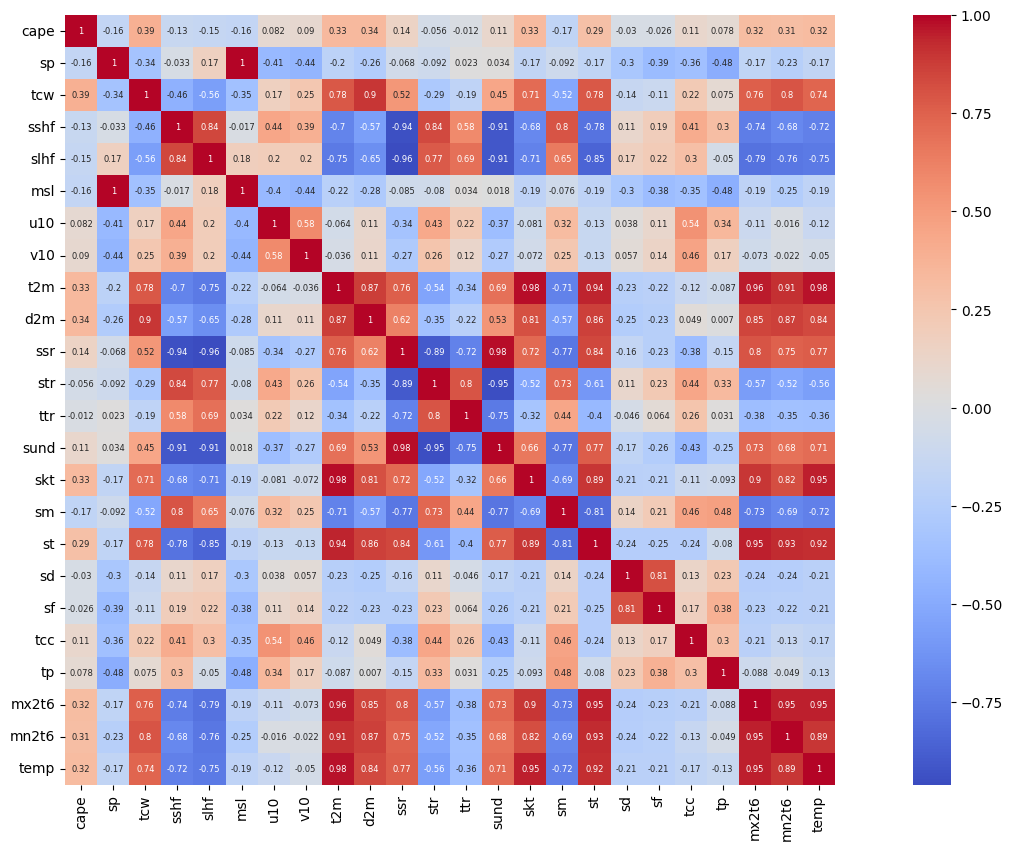

In [40]:
create_heatmap(df_merged)

I created a new heatmap to see better correlation between features and target temperature.

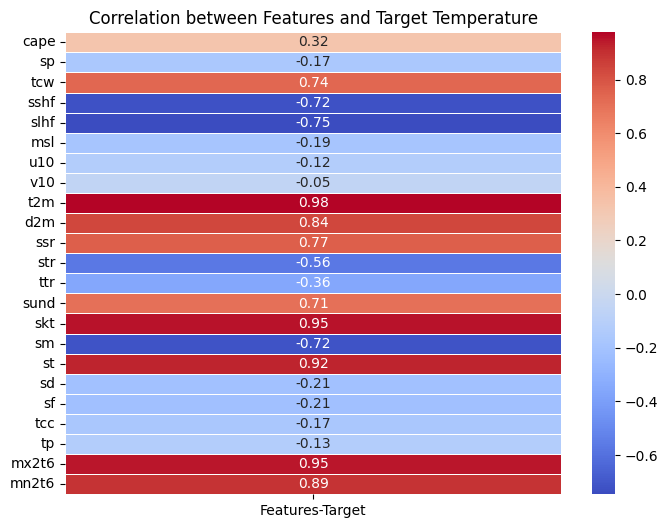

In [41]:
# Calculate the correlation between 'temp' and other features
temp_corr = df_merged.drop(columns=['temp']).corrwith(df_merged['temp'])

# Create a DataFrame to hold the correlation values
temp_corr_df = pd.DataFrame({'Features-Target': temp_corr})

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(temp_corr_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Features and Target Temperature')
plt.show()

When we look at the heatmap, the following attributes appear to have the strongest positive correlations with target data (temp):

- t2m (correlation: 0.98)
- skt (correlation: 0.95)
- mx2t6 (correlation: 0.95)
- st (correlation: 0.92)
- mn2t6 (correlation: 0.89)

But when you check the first big heatmap these features also have high correlation with each other.

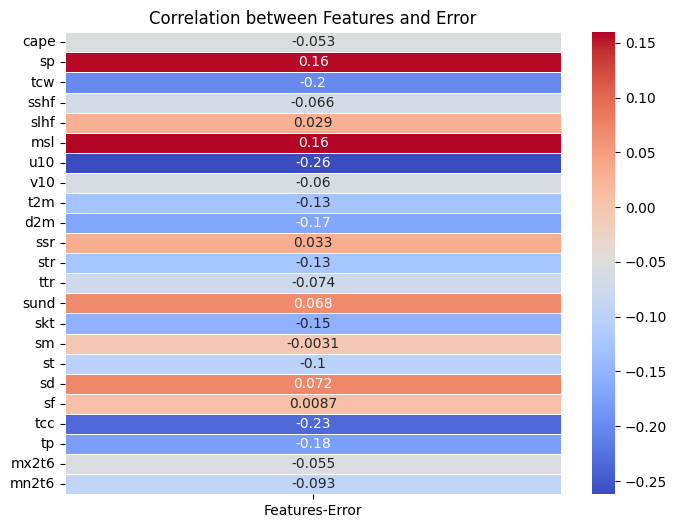

In [42]:
# I created a new heatmap to see better correlation between features and error

# Calculate the correlation between 'temp' and other features
corr = df_merged.drop(columns=['temp']).corrwith((df_merged['temp']-df_merged['t2m']))

# Create a DataFrame to hold the correlation values
corr_df = pd.DataFrame({'Features-Error': corr})

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Features and Error')
plt.show()

I also created one more heatmap above to see correlation between features and error. The following attributes appear to have the correlations with error:
- u10 (correlation: -0.26)
- tcc (correlation: -0.23)
- tcw (correlation: -0.2)
- msl (correlation: 0.16)
- sp (correlation: 0.16)


But this correaltion matrix is only shows linear realation, that is why when we use non-linear model to chose feature according to these heatmaps will be not enough.

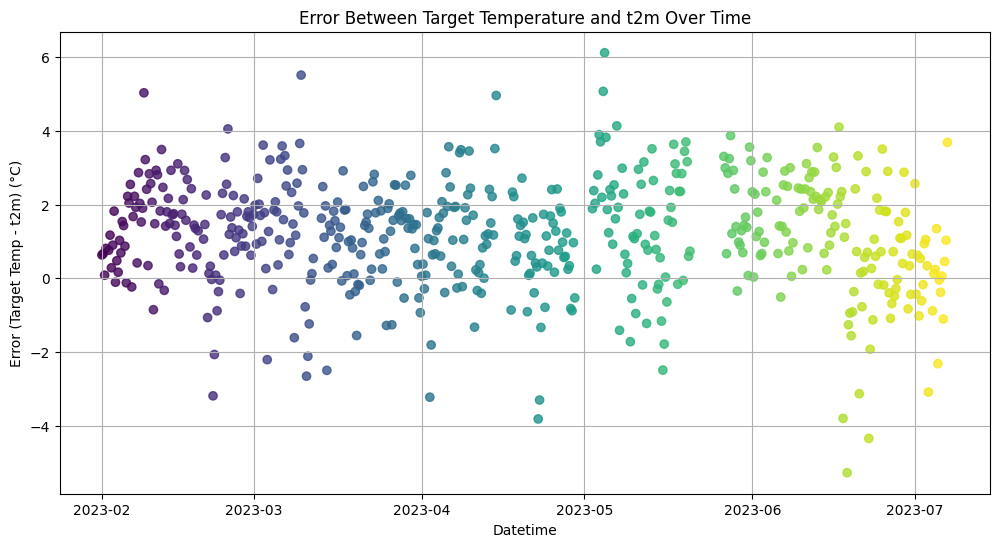

In [43]:
# Graph: Error Between Target Temperature and t2m Over Time
plt.figure(figsize=(12, 6))
plt.scatter(df_merged.index, df_merged['temp'] - df_merged['t2m'], c=df_merged.index, cmap='viridis', alpha=0.8)
plt.title('Error Between Target Temperature and t2m Over Time')
plt.xlabel('Datetime')
plt.ylabel('Error (Target Temp - t2m) (°C)')
plt.grid(True)
plt.show()


The graph above shows that errors are looks similar over different months and there is no any trend in any period that error occurs more. I splited the data set into three parts: 80% for training, 10% validation, and 10% for testing. This split avoids bias in machine leaning model. If we split randomly, similar data might end up in both training and validation sets. And this can make our model bias. But by splitting based on time makes our model more reliable and accurate. 


# Dividing Dataset into a training, validation and test set

In [44]:
# Dividing Dataset into a training, validation and test set
# 80% of data for training
# 10% of data for validation
# 10% data for test 

total_len = len(df_merged)

train_len = int(total_len * 0.8)
val_len = int(total_len * 0.1)
test_len = total_len - train_len - val_len

train_data = df_merged.iloc[: train_len]
val_data = df_merged.iloc[train_len : train_len + val_len]
test_data = df_merged.iloc[train_len + val_len :]

print("Training set size:", len(train_data))
print("Validation set size:", len(val_data))
print("Test set size:", len(test_data))

Training set size: 440
Validation set size: 55
Test set size: 56


In [45]:
X_train = train_data.drop(['temp'], axis=1)
y_train = train_data['temp']

X_val= val_data.drop(['temp'], axis=1)
y_val= val_data['temp']

X_test= test_data.drop(['temp'], axis=1)
y_test= test_data['temp']

Some Evaluation metrics:

- **Mean Absolute Error (MAE)** is a measure of the average size of the mistakes in a collection of predictions, without taking their direction into account. It is measured as the average absolute difference between the predicted values and the actual values and is used to assess the effectiveness of a regression model. (source: https://deepchecks.com/glossary/mean-absolute-error/)
- **Root Mean Squared Error(RMSE)** corresponds to the square root of the average of the squared difference between the target value and the value predicted by the regression model.(source: https://neptune.ai/blog/performance-metrics-in-machine-learning-complete-guide)
- **Bias** is calculated as the avarage of the differences between the predicted and actual values. Bias is really important it gives you idea about is your model above your estimation or below your estimation.

In regression tasks, the Mean Squared Error (MSE) might be the default metric, but it’s vital to consider other metrics to capture different aspects of performance. Root Mean Squared Error (RMSE) provides a more interpretable scale, while Mean Absolute Error (MAE) focuses on the magnitude of errors rather than their squared values. (source: https://medium.com/@sruthy.sn91/model-evaluation-metrics-a-comprehensive-guide-96b71c732937 )

In this project to evaluate models mae, rmse and bias are used. 

In [46]:
def evaluate(model, features, target):
    predictions = model.predict(features)
    mae = mean_absolute_error(target, predictions)
    rmse = root_mean_squared_error(target, predictions)
    bias=np.mean(predictions-target)

    print('Average Error: {:0.4f} degrees.'.format(mae))
    print('RMSE = {:0.4f}.'.format(rmse))
    print('Bias : %.3f bias' % bias)

# Feeding the data to the model
## Linear Regression

As feauure selection for my linear regression model i used selectKbest. This fuction select the top k features that have the strongest relationship with the target variable.

### selectKBest function to choose feautures

In [99]:
# Apply SelectKBest with the best number of features
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

kbest = SelectKBest(score_func=f_regression, k=5)
kbest.fit(X_train, y_train)
    
# Get selected feature names
selected_feature_names = X_train.columns[kbest.get_support()]

selected_feature_names.tolist()

['t2m', 'd2m', 'skt', 'st', 'mx2t6']

# Fit Linear Regression Model and Evalute

In [48]:
X_train_lin = X_train[selected_feature_names]
X_val_lin = X_val[selected_feature_names]
X_test_lin = X_test[selected_feature_names]

In [49]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_lin, y_train)

LinearRegression()

In [50]:
print("---Tranning set performance---")
evaluate(lin_reg, X_train_lin, y_train)
print(" ")
print("---Validation set performance---")
evaluate(lin_reg, X_val_lin, y_val)

---Tranning set performance---
Average Error: 1.0345 degrees.
RMSE = 1.3482.
Bias : 0.000 bias
 
---Validation set performance---
Average Error: 1.2757 degrees.
RMSE = 1.8827.
Bias : 0.492 bias


My model looks overfitting meaning that the model is really good on training data but unable to generalize well to unseen data. I could not find to way to generalize better to unseen data. The reason can be beacause the training data size is too small and does not contain enough data samples to accurately represent all possible input data values.

In [51]:
# Parameters
# The coefficients
print("Coefficients: \n", lin_reg.coef_)
# The intercept 
print('Intercept : ', lin_reg.intercept_)

Coefficients: 
 [ 1.19192491 -0.14338609 -0.17638974  0.04087324  0.071742  ]
Intercept :  0.7145969017032847


In [52]:
# To visualize the comparison between predicted and actual temperatures according to the given model
def graph_actual_predict_temp(model, X_val, y_val):
    predicted_temps = model.predict(X_val)
    plt.figure(figsize=(12, 6))
    plt.plot(y_val, label='Actual Temperature', color='blue')
    plt.plot(X_val.index, predicted_temps, label='Predicted Temperature', color='red')
    plt.title('Actual vs Predicted Temperature')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)
    plt.show()


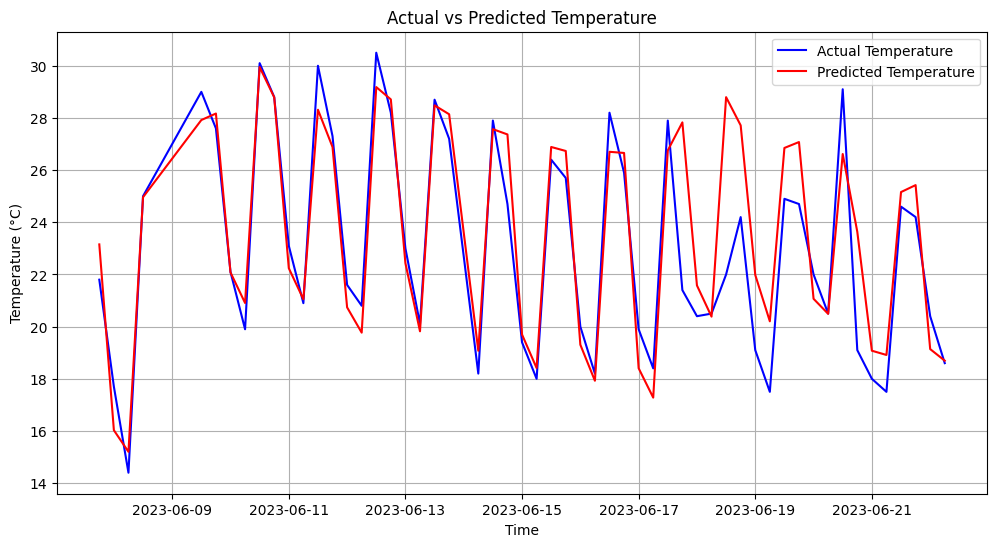

In [53]:
graph_actual_predict_temp(lin_reg, X_val_lin, y_val)

According to the graph we can see that the predicted temperatures generally follow the trend of the actual temperatures. But there are some differences where the red line does not align perfectly with the blue line.


# Random Forest

In [54]:
# Feature Selection for our Random Forest Model

# Random Forest Regression - Model 2

# https://www.kaggle.com/code/jondavidorr/hyperparameter-tuned-random-forest-regressor

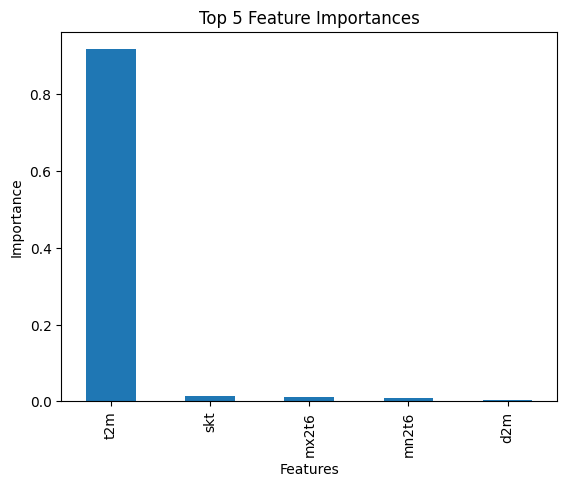

In [55]:
# Examine the Default Random Forest to Choose Important Features

base_model = RandomForestRegressor(random_state = 42)
base_model.fit(X_train, y_train)

rf_list = list(X_train.columns)

rf_importance = pd.Series(base_model.feature_importances_, index=rf_list).sort_values(ascending=False)

# the array containing feature importances
importances = pd.Series(rf_importance, index=X_train.columns).nlargest(5)
importances.plot(kind='bar')
plt.xlabel('Features')

plt.ylabel('Importance')
plt.title('Top 5 Feature Importances')
plt.show()


As we in the graph above feature t2m is more important in our random forest model. I choose this feature to continue hyperparameter tunning.

In [56]:
X_train_rf = X_train[['t2m']]
X_val_rf = X_val[['t2m']]
X_test_rf = X_test[['t2m']]



In [57]:
base_model.fit(X_train_rf, y_train)

print("---Training Performance---")
evaluate(base_model, X_train_rf, y_train)
print(" ")
print("---Validation Performance---")
evaluate(base_model, X_val_rf, y_val)

---Training Performance---
Average Error: 0.4792 degrees.
RMSE = 0.6268.
Bias : 0.016 bias
 
---Validation Performance---
Average Error: 2.3165 degrees.
RMSE = 2.9492.
Bias : -1.045 bias


My RandomForestRegressor model looks overfitting i will continue hyperparameter tunning to generalize my model for unseen data. 

In [58]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)

# Create the random grid
random_grid = {'n_estimators': n_estimators,
                'max_depth': max_depth
}

In [59]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_root_mean_squared_error', 
                              cv = 3, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(X_train_rf, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [60]:
# shows the best parameters according to randomized search 
rf_random.best_params_

{'n_estimators': 400, 'max_depth': 10}

In [61]:
# evaluate random forest using best estimator
best_random = rf_random.best_estimator_

print("---Training Performance---")
evaluate(best_random, X_train_rf, y_train)
print(" ")
print("---Validation Performance---")
evaluate(best_random, X_val_rf, y_val)

---Training Performance---
Average Error: 0.5390 degrees.
RMSE = 0.6768.
Bias : 0.012 bias
 
---Validation Performance---
Average Error: 2.3199 degrees.
RMSE = 2.9640.
Bias : -1.027 bias


Chosen parameter: 1


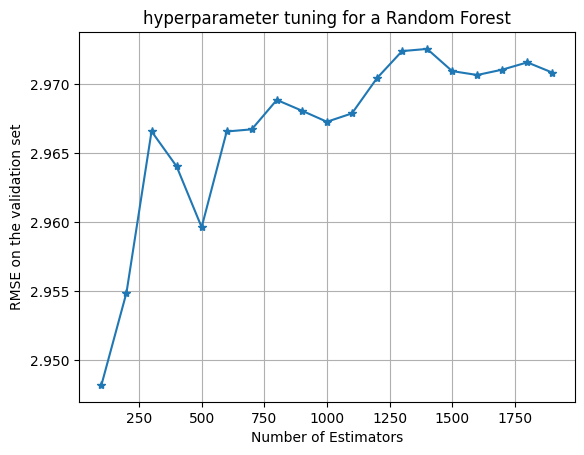

In [62]:
# this code in order to see how model performance is changing when we incresae the number of n_estimator

valRMSE=[]
for i in range(100,2000,100):
    est = i
    model_rf = RandomForestRegressor(n_estimators=est, max_depth = 10, random_state=42)
    model_rf.fit(X_train_rf, y_train)
    #validate the model
    predval = model_rf.predict(X_val_rf)
    valRMSE.append(root_mean_squared_error(predval, y_val))

plt.plot(range(100,2000,100), valRMSE,'-*')
plt.xlabel("Number of Estimators")
plt.ylabel("RMSE on the validation set")
plt.title('hyperparameter tuning for a Random Forest')
plt.grid()
#Choose the best parameter value
minindex = np.argmin(valRMSE)
print('Chosen parameter: ' + str(minindex+1))

As we see in the graph above when we set our max_depth to 10 and change the n_estimators, the performance does not inncreased, it dicreased. And also computational time increased. It shows the best performance when max_depth = 10 and n_setimator = 100.
In the second code we will do n_estimator 100 and trying to see how performance chaning when we increase number of max_depth.

Chosen parameter: 5


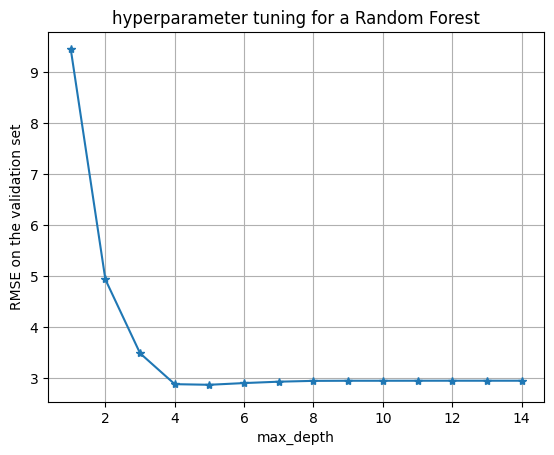

In [97]:
# this code in order to see how model performance is changing when we incresae the number of max_depth

valRMSE=[]
for i in range(1,15,1):
    depth = i
    model_rf2 = RandomForestRegressor(n_estimators=100, max_depth = depth, random_state=42)
    model_rf2.fit(X_train_rf, y_train)
    #validate the model
    predval = model_rf2.predict(X_val_rf)
    valRMSE.append(root_mean_squared_error(y_val, predval))

# Plot the performance metrics
plt.plot(range(1,15,1), valRMSE,'-*')
plt.xlabel("max_depth")
plt.ylabel("RMSE on the validation set")
plt.title('hyperparameter tuning for a Random Forest')
plt.grid()
#Choose the best parameter value
minindex = np.argmin(valRMSE)
print('Chosen parameter: ' + str(minindex+1))

As we see in the graph above when we increased the max_depth after 4-5 i stayed contant and it did not increased the performance.

In [98]:
# fit the model with parameters n_estimators=100, max_depth=5
model_rf_best = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model_rf_best.fit(X_train_rf, y_train)

print("---Training Performance---")
evaluate(model_rf_best, X_train_rf, y_train)
print(" ")
print("---Validation Performance---")
evaluate(model_rf_best, X_val_rf, y_val)

---Training Performance---
Average Error: 0.8723 degrees.
RMSE = 1.1409.
Bias : 0.014 bias
 
---Validation Performance---
Average Error: 2.2391 degrees.
RMSE = 2.8692.
Bias : -0.987 bias


# Grid Search 

Now that we have the results of the random search, we can improve our model by applying the grid search. We will test a range of hyperparameters around the best values found through random search. 

In [65]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [100, 200, 300, 400]
}

# Create a based model
rf = RandomForestRegressor(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring = 'neg_mean_absolute_error', cv = 3, 
                           n_jobs = -1)

In [66]:
# Fit the grid search to the data
grid_search.fit(X_train_rf, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='neg_mean_absolute_error')

In [67]:
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 400}

In [68]:
best_grid = grid_search.best_estimator_

print("---Training Performance---")
evaluate(best_grid, X_train_rf, y_train)
print(" ")
print("---Validation Performance---")
evaluate(best_grid, X_val_rf, y_val)

---Training Performance---
Average Error: 0.8650 degrees.
RMSE = 1.1338.
Bias : 0.005 bias
 
---Validation Performance---
Average Error: 2.2396 degrees.
RMSE = 2.8705.
Bias : -0.973 bias


I do hyperparameter tunning one more time to see if we can find a better model.

In [69]:
param_grid = {
    'max_depth': [2, 4, 5, 10, 12],  
    'n_estimators': [400, 600, 800, 1000, 1200] 
}

# Create a based model
rf = RandomForestRegressor(random_state=42)

# Instantiate the grid search model
grid_search_ad = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring = 'neg_mean_absolute_error', cv = 3, 
                           n_jobs = -1)

grid_search_ad.fit(X_train_rf, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 5, 10, 12],
                         'n_estimators': [400, 600, 800, 1000, 1200]},
             scoring='neg_mean_absolute_error')

In [70]:
grid_search_ad.best_params_

{'max_depth': 4, 'n_estimators': 1200}

In [71]:
best_grid_ad = grid_search_ad.best_estimator_

print("---Training Performance---")
evaluate(best_grid_ad, X_train_rf, y_train)
print(" ")
print("---Validation Performance---")
evaluate(best_grid_ad, X_val_rf, y_val)


---Training Performance---
Average Error: 0.9378 degrees.
RMSE = 1.2475.
Bias : 0.002 bias
 
---Validation Performance---
Average Error: 2.2191 degrees.
RMSE = 2.8609.
Bias : -1.008 bias


When we look all random forest last model shows better performance amongs other random forest model.

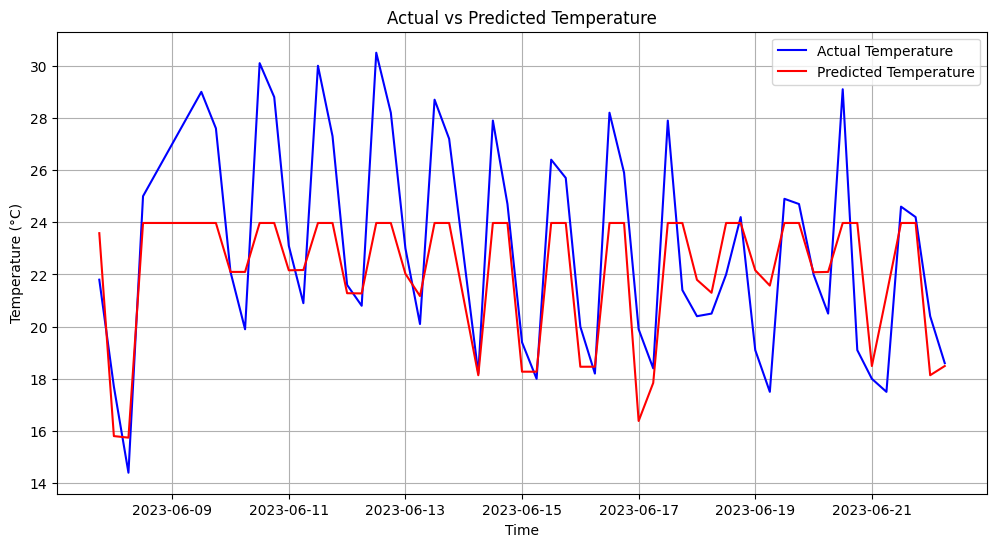

In [72]:
# see on the graph actual vs predicted temperture usin Random Forest Regressor
graph_actual_predict_temp(best_grid_ad, X_val_rf, y_val)

The random forest model's predictions do not match the actual temperatures closely. The predictions tend to stay around a consistent range and miss the peaks and valleys shown in the actual data. Random forest combines a lot of Decision trees to create a single model. In our random forest model t2m most impotant features meaning that most of the decision are taken depeding on this t2m. On our training set maximum target temperature we gave was around 24°C meaning that if we input high t2m compare to training set during validation or testing, the model predicts 24°C because it doesn't have any information about temperatures beyond that.

# KNN Regressor

As the last model i used knn regressor. By changing the number of neighbors i tried to find the best knn regressor model. 

Chosen parameter (number of neighbors) using cross-validation: 10


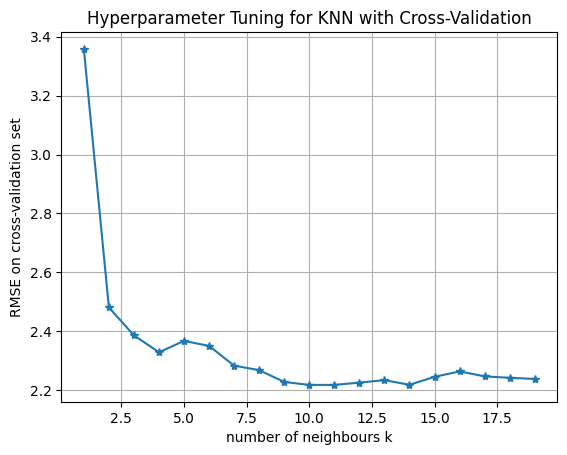

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score


# Feature scaling is crucial for the KNN algorithm, as it helps in preventing features with larger magnitudes from dominating the distance calculations
# https://forecastegy.com/posts/is-feature-scaling-required-for-the-knn-algorithm/.
scaler = MinMaxScaler((0, 1))

X_train_scaled = scaler.fit_transform(X_train_lin)
X_val_scaled = scaler.transform(X_val_lin)
X_test_scaled = scaler.transform(X_test_lin)

valRMSE = []

for i in range(1, 20):
    n_neighbors = i
    model = KNeighborsRegressor(n_neighbors, weights='distance')
    # Perform cross-validation
    scores = cross_val_score(model, X_val_scaled, y_val, cv=5, scoring='neg_root_mean_squared_error')
    val_rmse = (-scores.mean())
    valRMSE.append(val_rmse)

# Add 1 to get the actual number of neighbors
best_n_neighbors = np.argmin(valRMSE) + 1  

plt.plot(range(1, 20), valRMSE, '-*')
plt.xlabel("number of neighbours k")
plt.ylabel("RMSE on cross-validation set")
plt.title('Hyperparameter Tuning for KNN with Cross-Validation')
plt.grid()

print('Chosen parameter (number of neighbors) using cross-validation:', best_n_neighbors)


As we see in the graph above when we increased the n_neighbours beyond 10 neighbours, it does not increase the performance. So we choose the best number of neighbours to fit our model and to evaluate its performance. 

In [94]:
knn_model = KNeighborsRegressor(n_neighbors=best_n_neighbors,weights='distance')
knn_model.fit(X_train_scaled, y_train)

# Evaluate on the test set
print("---Training Performance---")
evaluate(knn_model, X_train_scaled, y_train)
print(" ")
print("---Training Performance---")
evaluate(knn_model, X_val_scaled, y_val)

---Training Performance---
Average Error: 0.0000 degrees.
RMSE = 0.0000.
Bias : 0.000 bias
 
---Training Performance---
Average Error: 2.4713 degrees.
RMSE = 3.1329.
Bias : -1.055 bias


We can see that our model is still overfitting, and it hasn't demonstrated better performance compared to other models.

# Decide for the model and TEST

When i compare all my models i can see that linear regression model shows better performance among other model. As we chose our model we can do last evaluation with test set.

In [75]:
evaluate(lin_reg, X_test_lin, y_test)

Average Error: 1.3880 degrees.
RMSE = 1.7183.
Bias : 1.014 bias


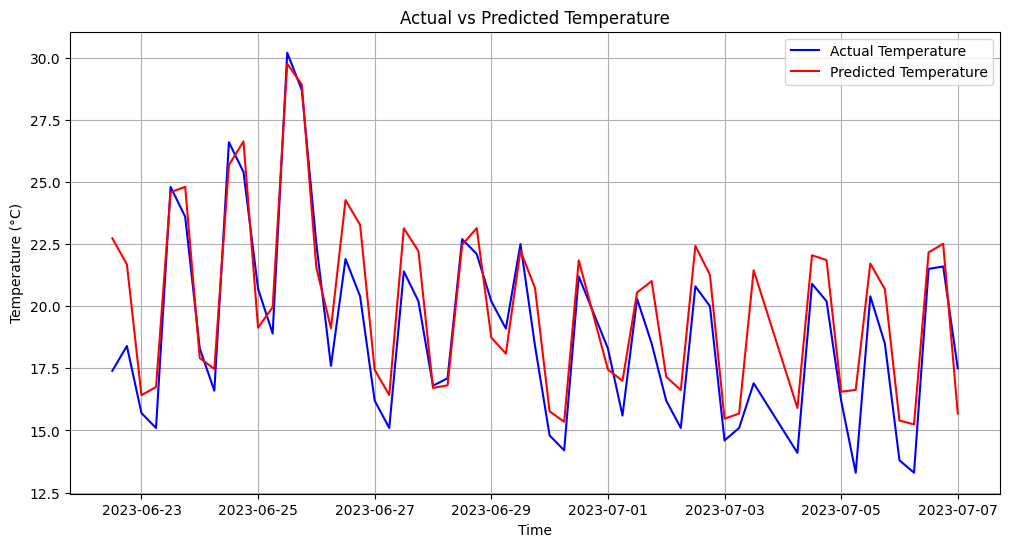

In [76]:
# Visualize actual temperature and predicted temperature using test set. 
graph_actual_predict_temp(lin_reg, X_test_lin, y_test)

According to the graph we can see that the predicted temperatures generally follow the trend of the actual temperatures. 

# Weekly Correct Temperature

In [77]:
df_corrected = pd.read_csv('Forecast_23_03_2024.csv')

In [78]:
df_corrected = arrange_time(df_corrected)
df_corrected = convert_to_celsius(df_corrected)

In [79]:
df_corrected.set_index('datetime', inplace=True)

In [80]:
# Selecting columns from df_merged and assigning them to a new DataFrame
df_new_correct = df_corrected[['t2m','d2m','skt','st','mx2t6']].copy()
df_new_correct

,t2m,d2m,skt,st,mx2t6
datetime,,,,,
2024-03-23,7.73870,6.28750,7.30640,9.45560,NaN
2024-03-23,7.71856,6.01140,7.08830,9.46124,NaN
2024-03-23,7.81286,6.32950,7.24767,9.40685,NaN
2024-03-23,7.21830,5.36785,6.70070,9.59564,NaN
2024-03-23,7.46954,6.55862,7.16418,9.49645,NaN
...,...,...,...,...,...
2024-03-30,11.04757,9.95290,10.22980,11.21750,13.47387
2024-03-30,9.60620,8.02413,8.92578,9.99584,13.39330
2024-03-30,12.18878,10.50167,11.00430,10.44192,13.35726


In [81]:
df_new_correct.dropna(inplace=True)
df_new_correct.apply(pd.isnull).sum()

t2m      0
d2m      0
skt      0
st       0
mx2t6    0
dtype: int64

In [82]:
pre = lin_reg.predict(df_new_correct)

In [83]:
df_new_correct

,t2m,d2m,skt,st,mx2t6
datetime,,,,,
2024-03-23 06:00:00,4.91924,3.08087,4.13757,8.08553,7.73920
2024-03-23 06:00:00,4.62194,3.27377,3.97494,8.00646,7.71914
2024-03-23 06:00:00,4.79455,3.50158,4.19592,8.06823,7.81317
2024-03-23 06:00:00,4.96813,3.52100,4.23712,8.18456,7.21758
2024-03-23 06:00:00,4.10473,2.74362,3.36050,7.91247,7.46868
...,...,...,...,...,...
2024-03-30 00:00:00,11.04757,9.95290,10.22980,11.21750,13.47387
2024-03-30 00:00:00,9.60620,8.02413,8.92578,9.99584,13.39330
2024-03-30 00:00:00,12.18878,10.50167,11.00430,10.44192,13.35726


In [84]:
pre

array([ 6.29209028,  5.9340871 ,  6.07745251, ..., 13.18094004,
        9.68032514,  9.00662155])

In [85]:
df_new_correct['t2m'] = pre


In [86]:
df_new_correct.t2m

datetime
2024-03-23 06:00:00     6.292090
2024-03-23 06:00:00     5.934087
2024-03-23 06:00:00     6.077453
2024-03-23 06:00:00     6.236321
2024-03-23 06:00:00     5.480198
                         ...    
2024-03-30 00:00:00    12.076070
2024-03-30 00:00:00    10.808926
2024-03-30 00:00:00    13.180940
2024-03-30 00:00:00     9.680325
2024-03-30 00:00:00     9.006622
Name: t2m, Length: 1400, dtype: float64

In [87]:
df_new_correct.reset_index(inplace=True)

In [88]:
df_correct=df_new_correct[['datetime','t2m']].copy()

In [89]:
df_correct

,datetime,t2m
0,2024-03-23 06:00:00,6.292090
1,2024-03-23 06:00:00,5.934087
2,2024-03-23 06:00:00,6.077453
3,2024-03-23 06:00:00,6.236321
4,2024-03-23 06:00:00,5.480198
...,...,...
1395,2024-03-30 00:00:00,12.076070
1396,2024-03-30 00:00:00,10.808926
1397,2024-03-30 00:00:00,13.180940
1398,2024-03-30 00:00:00,9.680325


In [90]:
# Creation of the results Dataframes which will be made into one df later on
result_t2m  = pd.DataFrame(columns=['forecast_date','target','horizon','q0.025','q0.25','q0.5','q0.75','q0.975'])

In [91]:
times=df_correct.datetime.unique()
number_of_hours=6
date = "2024-03-23"
row_index=0
for t in times:
  df_=df_correct[df_correct['datetime']==t]
  t2m = []
  t2m=df_.t2m.values


  horizon = str(number_of_hours)+' hour'
  result_t2m.loc[row_index]  = [date, 't2m', horizon , np.quantile(t2m,0.025),np.quantile(t2m,0.25),np.quantile(t2m,0.5),np.quantile(t2m,0.75),np.quantile(t2m,0.975)]
  row_index=row_index+1
  number_of_hours = number_of_hours + 6


In [92]:
# Dataframes concatination and result exportation
pd.DataFrame.to_csv(result_t2m,"20240323_TheWeeknd.csv", index=False)